## KMEANS APPLIED ON 150 RANDOMLY GENERATED SAMPLES

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=17)
#we have 3 clusters and 2 features

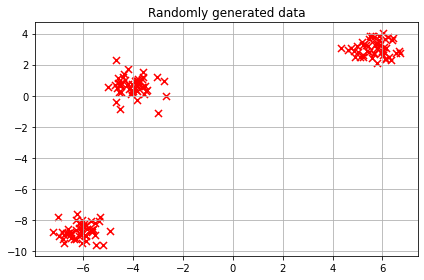

In [6]:
plt.scatter(X[:, 0], X[:, 1], c='red', marker='x', edgecolor='black', s=50)
plt.grid()
plt.title('Randomly generated data')
plt.tight_layout()
plt.show()

In [8]:
#Kmeans impementation
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=17)
#you have to specify the number of clusters you want to form, this is a limitation of Kmeans
#init = 'random' means that the initial centroids are chosen randomly
#n_init = 10 means that the algorithm will run 10 times with different random centroids, then it will choose teh best one according to the inertia (SSE)

y_km = km.fit_predict(X)

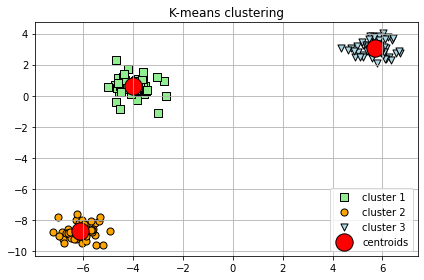

In [13]:
#Clusters visualization

#CLUSTER 1
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
#y_km == 0 means that the point belongs to cluster 1
#X[y_km == 0, 0] means that we are taking the x coordinate of the points that belong to cluster 1
#X[y_km == 0, 1] means that we are taking the y coordinate of the points that belong to cluster 1
#s=50 means that the size of the points is 50
#c='lightgreen' means that the color of the points is lightgreen
#marker='s' means that the points are squares
#edgecolor='black' means that the edge of the points is black
#label='cluster 1' means that the label of the points is cluster 1

#CLUSTER 2
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')

#CLUSTER 3
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 3')

#CENTROIDS VISUALIZATION (RED DOTS)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='red', marker='o', edgecolor='black', label='centroids')
#km.cluster_centers_[:, 0] means that we are taking the x coordinate of the centroids
#km.cluster_centers_[:, 1] means that we are taking the y coordinate of the centroids
#s=300 means that the size of the centroids is 300

plt.legend(scatterpoints=1)

plt.grid()
plt.title('K-means clustering')

plt.tight_layout()
plt.show()

In [14]:
#Model evaluation
print('Distortion: %.2f' % km.inertia_)
#The distortion is the sum of the squared distances between each training instance and its closest centroid
#The lower the distortion the better the model
#The distortion is stored in the inertia_ attribute of the KMeans object


Distortion: 79.29


## KMeans ++

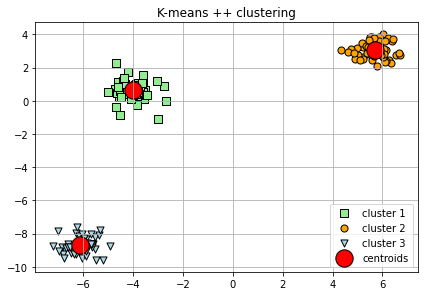

In [17]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=17)
#k-means++ is a smart way to initialize the centroids
#It places the centroids as far away as possible from each other
#This is better than the random initialization
#k-means++ is the default initialization method in scikit-learn

y_km = km.fit_predict(X)

#CLUSTER 1
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')

#CLUSTER 2
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')

#CLUSTER 3
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 3')

#CENTROIDS VISUALIZATION (RED DOTS)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='red', marker='o', edgecolor='black', label='centroids')

plt.legend(scatterpoints=1)
plt.tight_layout()
plt.grid()

plt.title('K-means ++ clustering')
plt.show()

In [18]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 79.29


## Elbow graphic method

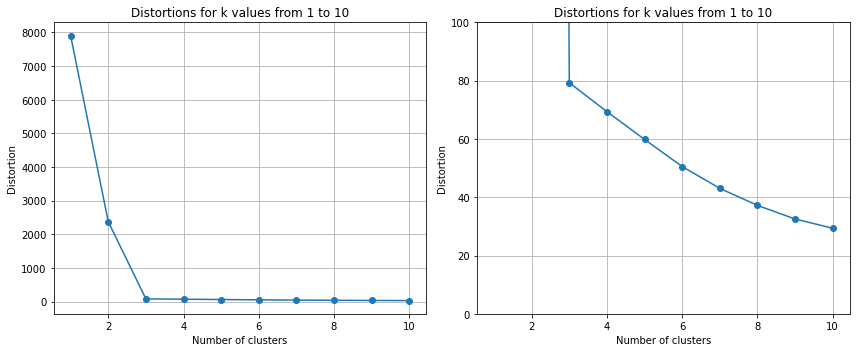

In [28]:
#Plot all the distortions for k values from 1 to 10

distorsions = []
for i in range(1, 11):
    #find the optimal k value from the range 1 to 10
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=17)

    km.fit(X)
    distorsions.append(km.inertia_)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Primo grafico (senza regolazione dell'asse y)
axes[0].set_title('Distortions for k values from 1 to 10')
axes[0].plot(range(1, 11), distorsions, marker='o')
axes[0].set_xlabel('Number of clusters')
axes[0].set_ylabel('Distortion')
axes[0].grid()

# Secondo grafico (con regolazione dell'asse y)
axes[1].set_title('Distortions for k values from 1 to 10')
axes[1].plot(range(1, 11), distorsions, marker='o')
axes[1].set_xlabel('Number of clusters')
axes[1].set_ylabel('Distortion')
axes[1].grid()
axes[1].set_ylim(0, 100)

# Mostra i grafici con spaziatura adeguata
plt.tight_layout()
plt.show()

# The elbow is located at k = 3 -> k = 3 can be the best choice \
at k = 3 the distorsion starts growing rapidly 